# Hopfield demo

In [1]:
import numpy as np

from mnist import *

In [2]:
X, y = load_mnist_openml()

print(f"Data shape: {X.shape}, Labels shape: {y.shape}")
print(f"Data min: {X.min()}, Data max: {X.max()}")
print(f"Unique labels: {np.unique(y)}")

Data shape: (70000, 28, 28), Labels shape: (70000,)
Data min: 0, Data max: 255
Unique labels: [0 1 2 3 4 5 6 7 8 9]


## Image processing

To use MNIST images in a Hopfield network we need to encode them into a hopfield state.
Hopfield state is a 1-dimensional vetor of 1s and -1s. 

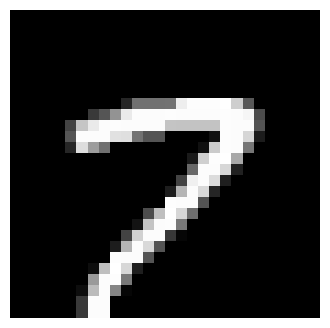

In [3]:
# plot a sample
ind = 123
image = X[ind]
plot_mnist_sample(image)

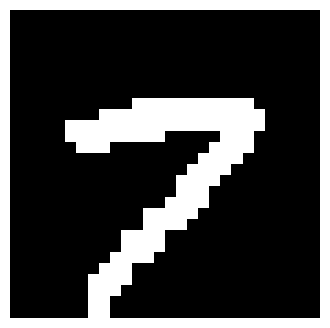

In [4]:
image_bin = binarize_mnist(image)
plot_mnist_sample(image_bin)

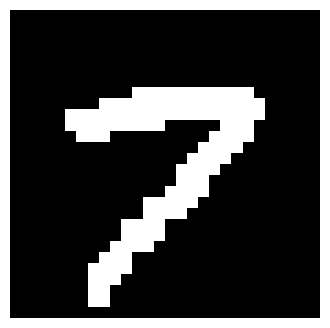

In [5]:
image_cent = center_by_centroid(image_bin)
plot_mnist_sample(image_cent)

In [6]:
state = mnist_to_state(image)
print(f"State shape: {state.shape}, State min: {state.min()}, State max: {state.max()}")

State shape: (784,), State min: -1, State max: 1


## Create prototypes of images (training dataset)

In [7]:
# prototype computation
prototypes = []
for d in range(10):
    p = X[y == d].mean(axis=0)
    prototypes.append(p)
prototypes = np.stack(prototypes)  # (10, 28, 28)

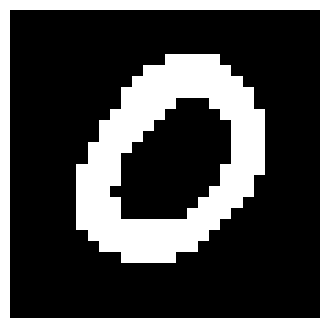

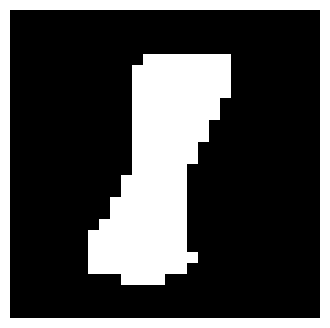

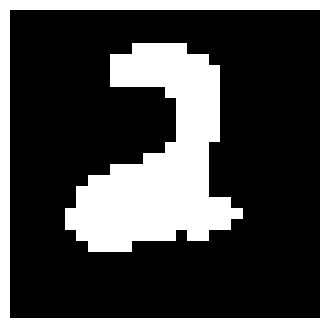

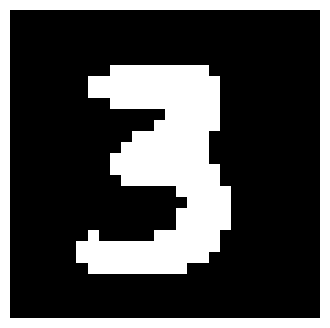

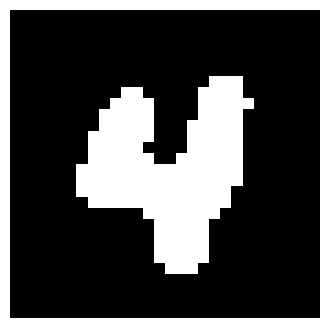

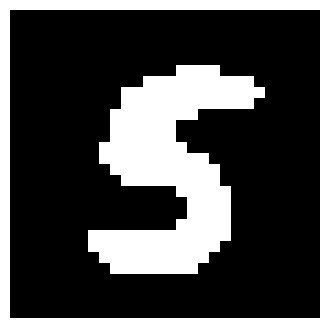

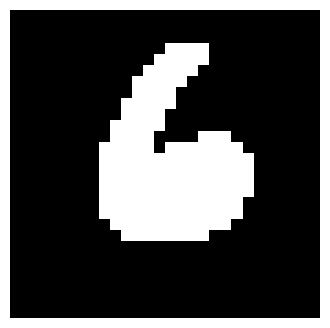

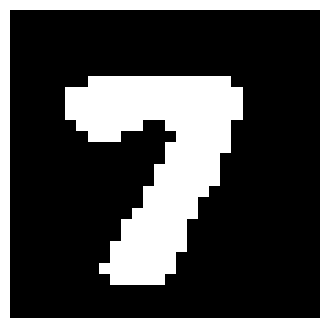

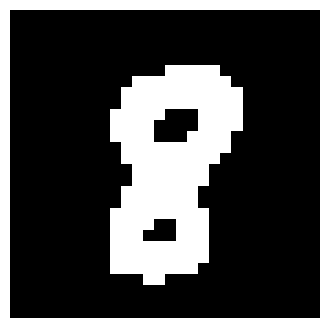

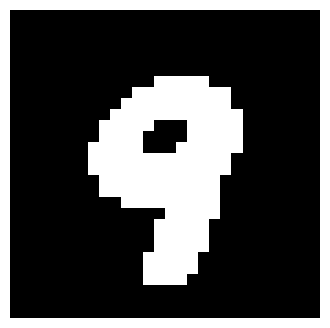

In [11]:
for i in range(10):
    p = prototypes[i]
    p_bin = binarize_mnist(p, method="percentile", perc=80)
    p_cent = center_by_centroid(p_bin)
    plot_mnist_sample(p_cent)

In [14]:
# create proto states
protostates = []
for i in range(10):
    state = mnist_to_state(prototypes[i])
    protostates.append(state)
protostates = np.stack(protostates)  # (10, N)

print(f"Proto states shape: {protostates.shape}, min: {protostates.min()}, max: {protostates.max()}")

# save protostates
np.savez_compressed("mnist_protostates.npz", protostates=protostates)

Proto states shape: (10, 784), min: -1, max: 1
